# <b> Python 301 - Análise de dados com PySpark </b>

### <b> O que é Spark? </b>

Apache Spark™ is a unified analytics engine for large-scale data processing.

### <b> Porquê utilizar PySpark? </b>

###### *PySpark é a biblioteca Python utilizada para escrever aplicações utilizando Spark. __[pyspark.sql module — PySpark 2.1.0 documentation](https://spark.apache.org/docs/2.1.0/api/python/pyspark.sql.html#)__

Se você:

1. sabe utilizar Python e Pandas?
2. trabalha com DataFrames?
3. quer trabalhar com massa de dados gigante?

__Então, utilize PySpark!__

### <b> Prós e Contras </b>

Prós:

* trabalhar com Big Data;
* SQL nativo na ferramenta;
* velocidade de processamento;

Contras:

* data visualization;
* material de pesquisa na web;

### <b> PySpark vs Pandas </b>

#### <b> Importando bibliotecas </b>

pandas e numpy

In [1]:
import pandas as pd
import numpy as np

pyspark
###### obs.: da forma como está configurado, não é necessário importar uma biblioteca específica para PySpark, no momento que se inicia no JupyterLab é carregado automaticamente.

In [2]:
import pyspark.sql.types as t
import pyspark.sql.functions as f

#### <b> Ler arquivos </b>

pandas

In [3]:
pandas_file = pd.read_csv('base_dados_py301.csv', delimiter = '|')

spark

In [4]:
spark_file = spark.read \
                  .option('inferSchema', 'true') \
                  .option('header', 'true') \
                  .option('delimiter', '|') \
                  .csv('base_dados_py301.csv')

#### <b> Visualizar DataFrame </b>

pandas

In [5]:
pandas_file.head(5)

,pla_cd_conta_cartao,mes_ref,auf_vl_real,auf_nm_unidade_credenciada,auf_cd_adquirente
0,3718344,2020-01,10.00,BOM PRECO AUTO POSTO ESPINOSA BRA,NaN
1,4266609,2020-01,15.00,RECVIVO *879815639 SAO PAULO BRA,39.0
2,4241912,2019-12,100.01,POSTO PARAKY DIAS D AVILA BRA,NaN
3,3586037,2019-12,34.00,MERCADOPAGO *LANCHONE OSASCO BRA,NaN
4,43883520,2019-12,31.82,LUIZ CARLOS PEREIRA DE PIRIPIRI BRA,20.0


spark

In [6]:
spark_file.show(5)

+-------------------+-------+-----------+--------------------------+-----------------+
|pla_cd_conta_cartao|mes_ref|auf_vl_real|auf_nm_unidade_credenciada|auf_cd_adquirente|
+-------------------+-------+-----------+--------------------------+-----------------+
|            3718344|2020-01|       10.0|      BOM PRECO AUTO PO...|             null|
|            4266609|2020-01|       15.0|      RECVIVO     *8798...|               39|
|            4241912|2019-12|     100.01|      POSTO PARAKY     ...|             null|
|            3586037|2019-12|       34.0|      MERCADOPAGO *LANC...|             null|
|           43883520|2019-12|      31.82|      LUIZ CARLOS PEREI...|               20|
+-------------------+-------+-----------+--------------------------+-----------------+
only showing top 5 rows



#### <b> Visualizar Colunas e Tipo de Dado </b>

pandas

In [7]:
pandas_file.columns

Index(['pla_cd_conta_cartao', 'mes_ref', 'auf_vl_real',
       'auf_nm_unidade_credenciada', 'auf_cd_adquirente'],
      dtype='object')

In [8]:
pandas_file.dtypes

pla_cd_conta_cartao             int64
mes_ref                        object
auf_vl_real                   float64
auf_nm_unidade_credenciada     object
auf_cd_adquirente             float64
dtype: object

spark

In [9]:
spark_file.columns

['pla_cd_conta_cartao',
 'mes_ref',
 'auf_vl_real',
 'auf_nm_unidade_credenciada',
 'auf_cd_adquirente']

In [10]:
spark_file.dtypes

[('pla_cd_conta_cartao', 'int'),
 ('mes_ref', 'string'),
 ('auf_vl_real', 'double'),
 ('auf_nm_unidade_credenciada', 'string'),
 ('auf_cd_adquirente', 'int')]

#### <b> Renomear colunas </b>

pandas

In [11]:
pandas_file.columns = ['cd_conta_cartao', 'mes_ref', 'valor_autorizacao', 'unidade_credenciada', 'adquirente']
pandas_file.head(5)

,cd_conta_cartao,mes_ref,valor_autorizacao,unidade_credenciada,adquirente
0,3718344,2020-01,10.00,BOM PRECO AUTO POSTO ESPINOSA BRA,NaN
1,4266609,2020-01,15.00,RECVIVO *879815639 SAO PAULO BRA,39.0
2,4241912,2019-12,100.01,POSTO PARAKY DIAS D AVILA BRA,NaN
3,3586037,2019-12,34.00,MERCADOPAGO *LANCHONE OSASCO BRA,NaN
4,43883520,2019-12,31.82,LUIZ CARLOS PEREIRA DE PIRIPIRI BRA,20.0


In [12]:
pandas_file = pd.read_csv('base_dados_py301.csv', delimiter = '|')
pandas_file.head(1)

,pla_cd_conta_cartao,mes_ref,auf_vl_real,auf_nm_unidade_credenciada,auf_cd_adquirente
0,3718344,2020-01,10.0,BOM PRECO AUTO POSTO ESPINOSA BRA,NaN


In [13]:
pandas_file.rename(columns = {'pla_cd_conta_cartao': 'cd_conta_cartao',
                              'auf_vl_real': 'valor_autorizacao',
                              'auf_nm_unidade_credenciada': 'unidade_credenciada',
                              'auf_cd_adquirente': 'adquirente'}, inplace = True)
pandas_file.head(5)

,cd_conta_cartao,mes_ref,valor_autorizacao,unidade_credenciada,adquirente
0,3718344,2020-01,10.00,BOM PRECO AUTO POSTO ESPINOSA BRA,NaN
1,4266609,2020-01,15.00,RECVIVO *879815639 SAO PAULO BRA,39.0
2,4241912,2019-12,100.01,POSTO PARAKY DIAS D AVILA BRA,NaN
3,3586037,2019-12,34.00,MERCADOPAGO *LANCHONE OSASCO BRA,NaN
4,43883520,2019-12,31.82,LUIZ CARLOS PEREIRA DE PIRIPIRI BRA,20.0


spark

In [14]:
spark_file_renamed = spark_file.toDF('cd_conta_cartao', 'mes_ref', 'valor_autorizacao', 'unidade_credenciada', 'adquirente')
spark_file_renamed.show(5)

+---------------+-------+-----------------+--------------------+----------+
|cd_conta_cartao|mes_ref|valor_autorizacao| unidade_credenciada|adquirente|
+---------------+-------+-----------------+--------------------+----------+
|        3718344|2020-01|             10.0|BOM PRECO AUTO PO...|      null|
|        4266609|2020-01|             15.0|RECVIVO     *8798...|        39|
|        4241912|2019-12|           100.01|POSTO PARAKY     ...|      null|
|        3586037|2019-12|             34.0|MERCADOPAGO *LANC...|      null|
|       43883520|2019-12|            31.82|LUIZ CARLOS PEREI...|        20|
+---------------+-------+-----------------+--------------------+----------+
only showing top 5 rows



In [15]:
spark_file = spark_file.withColumnRenamed('pla_cd_conta_cartao', 'cd_conta_cartao') \
                       .withColumnRenamed('auf_vl_real', 'valor_autorizacao') \
                       .withColumnRenamed('auf_nm_unidade_credenciada', 'unidade_credenciada') \
                       .withColumnRenamed('auf_cd_adquirente', 'adquirente')
spark_file.show(5)

+---------------+-------+-----------------+--------------------+----------+
|cd_conta_cartao|mes_ref|valor_autorizacao| unidade_credenciada|adquirente|
+---------------+-------+-----------------+--------------------+----------+
|        3718344|2020-01|             10.0|BOM PRECO AUTO PO...|      null|
|        4266609|2020-01|             15.0|RECVIVO     *8798...|        39|
|        4241912|2019-12|           100.01|POSTO PARAKY     ...|      null|
|        3586037|2019-12|             34.0|MERCADOPAGO *LANC...|      null|
|       43883520|2019-12|            31.82|LUIZ CARLOS PEREI...|        20|
+---------------+-------+-----------------+--------------------+----------+
only showing top 5 rows



#### <b> Filtrar DataFrame </b>

pandas

In [16]:
pandas_file[pandas_file.valor_autorizacao < 5].head(10)

,cd_conta_cartao,mes_ref,valor_autorizacao,unidade_credenciada,adquirente
19,4014677,2019-12,0.99,GOOGLE PLAY GARENA SAO PAULO BRA,NaN
74,3509638,2019-12,4.09,GOOGLE PLAY GARENA SAO PAULO BRA,NaN
115,4181061,2019-12,2.00,MULTMIX JOAO PESSOA BRA,NaN
117,4338727,2020-01,3.48,SUPERMERCADO COUTO LTD GOIANESIA BRA,20.0
141,3747072,2020-01,0.99,GOOGLE PLAY GARENA SAO PAULO BRA,NaN
145,4189638,2020-01,0.63,MERCPAGO *ROUPASUSA OSASCO BRA,39.0
148,3942751,2020-01,3.50,PADARIA SARAIVA ARARUAMA BRA,20.0
166,3886062,2020-01,4.07,GOOGLE PLAY GARENA SAO PAULO BRA,NaN
177,4320276,2020-01,4.09,GOOGLE PLAY GARENA SAO PAULO BRA,NaN
263,44121360,2020-01,2.50,CHURRASCARIA POSTO SOL SOLONOPOLE BRA,39.0


In [17]:
pandas_file[(pandas_file.valor_autorizacao < 5) & (pandas_file.mes_ref == '2020-01')].head(10)

,cd_conta_cartao,mes_ref,valor_autorizacao,unidade_credenciada,adquirente
117,4338727,2020-01,3.48,SUPERMERCADO COUTO LTD GOIANESIA BRA,20.0
141,3747072,2020-01,0.99,GOOGLE PLAY GARENA SAO PAULO BRA,NaN
145,4189638,2020-01,0.63,MERCPAGO *ROUPASUSA OSASCO BRA,39.0
148,3942751,2020-01,3.50,PADARIA SARAIVA ARARUAMA BRA,20.0
166,3886062,2020-01,4.07,GOOGLE PLAY GARENA SAO PAULO BRA,NaN
177,4320276,2020-01,4.09,GOOGLE PLAY GARENA SAO PAULO BRA,NaN
263,44121360,2020-01,2.50,CHURRASCARIA POSTO SOL SOLONOPOLE BRA,39.0
314,4058820,2020-01,1.90,GOOGLE PLAY TINDER SAO PAULO BRA,NaN
333,4087804,2020-01,3.00,PAG*JESSICAMONIQUEPER RECIFE BRA,NaN
349,3413005,2020-01,0.99,GOOGLE PLAY GARENA SAO PAULO BRA,NaN


spark

In [18]:
spark_file[spark_file.valor_autorizacao < 5].show(10)
spark_file.filter(spark_file.valor_autorizacao < 5).show(10)
spark_file.filter(f.col('valor_autorizacao') < 5).show(10)

+---------------+-------+-----------------+--------------------+----------+
|cd_conta_cartao|mes_ref|valor_autorizacao| unidade_credenciada|adquirente|
+---------------+-------+-----------------+--------------------+----------+
|        4014677|2019-12|             0.99|GOOGLE PLAY GAREN...|      null|
|        3509638|2019-12|             4.09|GOOGLE PLAY GAREN...|      null|
|        4181061|2019-12|              2.0|MULTMIX          ...|      null|
|        4338727|2020-01|             3.48|SUPERMERCADO COUT...|        20|
|        3747072|2020-01|             0.99|GOOGLE PLAY GAREN...|      null|
|        4189638|2020-01|             0.63|MERCPAGO    *ROUP...|        39|
|        3942751|2020-01|              3.5|PADARIA SARAIVA  ...|        20|
|        3886062|2020-01|             4.07|GOOGLE PLAY GAREN...|      null|
|        4320276|2020-01|             4.09|GOOGLE PLAY GAREN...|      null|
|       44121360|2020-01|              2.5|CHURRASCARIA POST...|        39|
+-----------

In [19]:
spark_file[(spark_file.valor_autorizacao < 5) & (spark_file.mes_ref == '2020-01')].show(10)
spark_file.filter((spark_file.valor_autorizacao < 5) & (spark_file.mes_ref == '2020-01')).show(10)
spark_file.filter((f.col('valor_autorizacao') < 5) & (f.col('mes_ref') == '2020-01')).show(10)

+---------------+-------+-----------------+--------------------+----------+
|cd_conta_cartao|mes_ref|valor_autorizacao| unidade_credenciada|adquirente|
+---------------+-------+-----------------+--------------------+----------+
|        4338727|2020-01|             3.48|SUPERMERCADO COUT...|        20|
|        3747072|2020-01|             0.99|GOOGLE PLAY GAREN...|      null|
|        4189638|2020-01|             0.63|MERCPAGO    *ROUP...|        39|
|        3942751|2020-01|              3.5|PADARIA SARAIVA  ...|        20|
|        3886062|2020-01|             4.07|GOOGLE PLAY GAREN...|      null|
|        4320276|2020-01|             4.09|GOOGLE PLAY GAREN...|      null|
|       44121360|2020-01|              2.5|CHURRASCARIA POST...|        39|
|        4058820|2020-01|              1.9|GOOGLE PLAY TINDE...|      null|
|        4087804|2020-01|              3.0|PAG*JESSICAMONIQU...|      null|
|        3413005|2020-01|             0.99|GOOGLE PLAY GAREN...|      null|
+-----------

#### <b> Adicionar colunas </b>

pandas

In [20]:
pandas_file['valor_inverso'] = 1 / pandas_file.valor_autorizacao
pandas_file.head(3)

,cd_conta_cartao,mes_ref,valor_autorizacao,unidade_credenciada,adquirente,valor_inverso
0,3718344,2020-01,10.00,BOM PRECO AUTO POSTO ESPINOSA BRA,NaN,0.100000
1,4266609,2020-01,15.00,RECVIVO *879815639 SAO PAULO BRA,39.0,0.066667
2,4241912,2019-12,100.01,POSTO PARAKY DIAS D AVILA BRA,NaN,0.009999


spark

In [21]:
spark_file = spark_file.withColumn('valor_inverso', 1 / spark_file.valor_autorizacao)
spark_file.show(3)

+---------------+-------+-----------------+--------------------+----------+-------------------+
|cd_conta_cartao|mes_ref|valor_autorizacao| unidade_credenciada|adquirente|      valor_inverso|
+---------------+-------+-----------------+--------------------+----------+-------------------+
|        3718344|2020-01|             10.0|BOM PRECO AUTO PO...|      null|                0.1|
|        4266609|2020-01|             15.0|RECVIVO     *8798...|        39|0.06666666666666667|
|        4241912|2019-12|           100.01|POSTO PARAKY     ...|      null|   0.00999900009999|
+---------------+-------+-----------------+--------------------+----------+-------------------+
only showing top 3 rows



#### <b> Preencher nulos </b>

pandas

In [22]:
print(pandas_file.isna().sum())

cd_conta_cartao            0
mes_ref                    0
valor_autorizacao          0
unidade_credenciada        0
adquirente             41983
valor_inverso              0
dtype: int64


In [23]:
pandas_file.fillna(99, inplace = True)
pandas_file.head(4)

,cd_conta_cartao,mes_ref,valor_autorizacao,unidade_credenciada,adquirente,valor_inverso
0,3718344,2020-01,10.00,BOM PRECO AUTO POSTO ESPINOSA BRA,99.0,0.100000
1,4266609,2020-01,15.00,RECVIVO *879815639 SAO PAULO BRA,39.0,0.066667
2,4241912,2019-12,100.01,POSTO PARAKY DIAS D AVILA BRA,99.0,0.009999
3,3586037,2019-12,34.00,MERCADOPAGO *LANCHONE OSASCO BRA,99.0,0.029412


In [24]:
print(pandas_file.isna().sum())

cd_conta_cartao        0
mes_ref                0
valor_autorizacao      0
unidade_credenciada    0
adquirente             0
valor_inverso          0
dtype: int64


spark

In [25]:
for p in spark_file.columns:
    print(p, spark_file.filter(spark_file[p].isNull()).count())

cd_conta_cartao 0
mes_ref 0
valor_autorizacao 0
unidade_credenciada 0
adquirente 41983
valor_inverso 0


In [26]:
spark_file = spark_file.fillna(99)
spark_file.show(4)

+---------------+-------+-----------------+--------------------+----------+--------------------+
|cd_conta_cartao|mes_ref|valor_autorizacao| unidade_credenciada|adquirente|       valor_inverso|
+---------------+-------+-----------------+--------------------+----------+--------------------+
|        3718344|2020-01|             10.0|BOM PRECO AUTO PO...|        99|                 0.1|
|        4266609|2020-01|             15.0|RECVIVO     *8798...|        39| 0.06666666666666667|
|        4241912|2019-12|           100.01|POSTO PARAKY     ...|        99|    0.00999900009999|
|        3586037|2019-12|             34.0|MERCADOPAGO *LANC...|        99|0.029411764705882353|
+---------------+-------+-----------------+--------------------+----------+--------------------+
only showing top 4 rows



In [27]:
for p in spark_file.columns:
    print(p, spark_file.filter(spark_file[p].isNull()).count())

cd_conta_cartao 0
mes_ref 0
valor_autorizacao 0
unidade_credenciada 0
adquirente 0
valor_inverso 0


#### <b> Agregação (groupby) </b>

pandas

In [28]:
pandas_file.groupby('mes_ref') \
           .agg({'valor_autorizacao': 'sum', 'cd_conta_cartao': 'count'})

,valor_autorizacao,cd_conta_cartao
mes_ref,,
2019-12,4236757.98,52221
2020-01,3746833.88,47779


spark

In [30]:
spark_file.groupBy('mes_ref') \
          .agg({'valor_autorizacao': 'sum', 'cd_conta_cartao': 'count'}) \
          .orderBy('mes_ref') \
          .show()

+-------+----------------------+----------------------+
|mes_ref|count(cd_conta_cartao)|sum(valor_autorizacao)|
+-------+----------------------+----------------------+
|2019-12|                 52221|     4236757.979999894|
|2020-01|                 47779|     3746833.879999902|
+-------+----------------------+----------------------+



#### <b> Transformações </b>

pandas

In [31]:
pandas_file['log_valor'] = np.log(pandas_file.valor_autorizacao)
pandas_file.head(5)

,cd_conta_cartao,mes_ref,valor_autorizacao,unidade_credenciada,adquirente,valor_inverso,log_valor
0,3718344,2020-01,10.00,BOM PRECO AUTO POSTO ESPINOSA BRA,99.0,0.100000,2.302585
1,4266609,2020-01,15.00,RECVIVO *879815639 SAO PAULO BRA,39.0,0.066667,2.708050
2,4241912,2019-12,100.01,POSTO PARAKY DIAS D AVILA BRA,99.0,0.009999,4.605270
3,3586037,2019-12,34.00,MERCADOPAGO *LANCHONE OSASCO BRA,99.0,0.029412,3.526361
4,43883520,2019-12,31.82,LUIZ CARLOS PEREIRA DE PIRIPIRI BRA,20.0,0.031427,3.460095


spark

In [32]:
spark_file = spark_file.withColumn('log_valor', f.log(spark_file.valor_autorizacao))
spark_file.show(5)

+---------------+-------+-----------------+--------------------+----------+--------------------+------------------+
|cd_conta_cartao|mes_ref|valor_autorizacao| unidade_credenciada|adquirente|       valor_inverso|         log_valor|
+---------------+-------+-----------------+--------------------+----------+--------------------+------------------+
|        3718344|2020-01|             10.0|BOM PRECO AUTO PO...|        99|                 0.1| 2.302585092994046|
|        4266609|2020-01|             15.0|RECVIVO     *8798...|        39| 0.06666666666666667|  2.70805020110221|
|        4241912|2019-12|           100.01|POSTO PARAKY     ...|        99|    0.00999900009999| 4.605270180988425|
|        3586037|2019-12|             34.0|MERCADOPAGO *LANC...|        99|0.029411764705882353|3.5263605246161616|
|       43883520|2019-12|            31.82|LUIZ CARLOS PEREI...|        20| 0.03142677561282212|3.4600950229096408|
+---------------+-------+-----------------+--------------------+--------

#### <b> Novas features condicionais </b>

pandas

In [33]:
pandas_file['classif_valor'] = pandas_file.apply(lambda x:
                                                 'baixo' if x.valor_autorizacao < 50 else 
                                                 'medio' if 50 <= x.valor_autorizacao <= 100 else
                                                 'alto', axis = 1)

In [34]:
pandas_file.head(5)

,cd_conta_cartao,mes_ref,valor_autorizacao,unidade_credenciada,adquirente,valor_inverso,log_valor,classif_valor
0,3718344,2020-01,10.00,BOM PRECO AUTO POSTO ESPINOSA BRA,99.0,0.100000,2.302585,baixo
1,4266609,2020-01,15.00,RECVIVO *879815639 SAO PAULO BRA,39.0,0.066667,2.708050,baixo
2,4241912,2019-12,100.01,POSTO PARAKY DIAS D AVILA BRA,99.0,0.009999,4.605270,alto
3,3586037,2019-12,34.00,MERCADOPAGO *LANCHONE OSASCO BRA,99.0,0.029412,3.526361,baixo
4,43883520,2019-12,31.82,LUIZ CARLOS PEREIRA DE PIRIPIRI BRA,20.0,0.031427,3.460095,baixo


spark

In [35]:
spark_file = spark_file.withColumn('classif_valor', \
                                   f.when(spark_file.valor_autorizacao < 50, 'baixo') \
                                    .when((spark_file.valor_autorizacao >= 50) & (spark_file.valor_autorizacao <= 100), 'medio') \
                                    .otherwise('alto'))

In [36]:
spark_file.show(5)

+---------------+-------+-----------------+--------------------+----------+--------------------+------------------+-------------+
|cd_conta_cartao|mes_ref|valor_autorizacao| unidade_credenciada|adquirente|       valor_inverso|         log_valor|classif_valor|
+---------------+-------+-----------------+--------------------+----------+--------------------+------------------+-------------+
|        3718344|2020-01|             10.0|BOM PRECO AUTO PO...|        99|                 0.1| 2.302585092994046|        baixo|
|        4266609|2020-01|             15.0|RECVIVO     *8798...|        39| 0.06666666666666667|  2.70805020110221|        baixo|
|        4241912|2019-12|           100.01|POSTO PARAKY     ...|        99|    0.00999900009999| 4.605270180988425|         alto|
|        3586037|2019-12|             34.0|MERCADOPAGO *LANC...|        99|0.029411764705882353|3.5263605246161616|        baixo|
|       43883520|2019-12|            31.82|LUIZ CARLOS PEREI...|        20| 0.031426775612

#### <b> Definição de funções </b>

pandas

In [37]:
pandas_file['valor_mais_100'] = pandas_file.valor_autorizacao.apply(lambda x: x+100)
pandas_file.head(5)

,cd_conta_cartao,mes_ref,valor_autorizacao,unidade_credenciada,adquirente,valor_inverso,log_valor,classif_valor,valor_mais_100
0,3718344,2020-01,10.00,BOM PRECO AUTO POSTO ESPINOSA BRA,99.0,0.100000,2.302585,baixo,110.00
1,4266609,2020-01,15.00,RECVIVO *879815639 SAO PAULO BRA,39.0,0.066667,2.708050,baixo,115.00
2,4241912,2019-12,100.01,POSTO PARAKY DIAS D AVILA BRA,99.0,0.009999,4.605270,alto,200.01
3,3586037,2019-12,34.00,MERCADOPAGO *LANCHONE OSASCO BRA,99.0,0.029412,3.526361,baixo,134.00
4,43883520,2019-12,31.82,LUIZ CARLOS PEREIRA DE PIRIPIRI BRA,20.0,0.031427,3.460095,baixo,131.82


spark

In [38]:
fn = f.udf(lambda x: x+100, t.DoubleType())

spark_file = spark_file.withColumn('valor_mais_100', fn(spark_file.valor_autorizacao))
spark_file.show(5)

+---------------+-------+-----------------+--------------------+----------+--------------------+------------------+-------------+--------------+
|cd_conta_cartao|mes_ref|valor_autorizacao| unidade_credenciada|adquirente|       valor_inverso|         log_valor|classif_valor|valor_mais_100|
+---------------+-------+-----------------+--------------------+----------+--------------------+------------------+-------------+--------------+
|        3718344|2020-01|             10.0|BOM PRECO AUTO PO...|        99|                 0.1| 2.302585092994046|        baixo|         110.0|
|        4266609|2020-01|             15.0|RECVIVO     *8798...|        39| 0.06666666666666667|  2.70805020110221|        baixo|         115.0|
|        4241912|2019-12|           100.01|POSTO PARAKY     ...|        99|    0.00999900009999| 4.605270180988425|         alto|        200.01|
|        3586037|2019-12|             34.0|MERCADOPAGO *LANC...|        99|0.029411764705882353|3.5263605246161616|        baixo| 

#### <b> Merge / Join DataFrame

pandas

In [39]:
merge_pandas_file = pd.read_csv('base_dados_py301_merge.csv', delimiter = '|')
pandas_merge_table = pandas_file.merge(merge_pandas_file, how = 'left', left_on = 'cd_conta_cartao', right_on = 'coc_cd_conta_cartao') 

## df_left.merge(df_right, on = ‘key’)

In [40]:
pandas_merge_table.head(10)

,cd_conta_cartao,mes_ref,valor_autorizacao,unidade_credenciada,adquirente,valor_inverso,log_valor,classif_valor,valor_mais_100,coc_cd_conta_cartao,coc_dt_abertura_conta_cartao
0,3718344,2020-01,10.00,BOM PRECO AUTO POSTO ESPINOSA BRA,99.0,0.100000,2.302585,baixo,110.00,3718344.0,2018-09-06 10:58:27
1,4266609,2020-01,15.00,RECVIVO *879815639 SAO PAULO BRA,39.0,0.066667,2.708050,baixo,115.00,4266609.0,2019-10-02 01:42:52
2,4241912,2019-12,100.01,POSTO PARAKY DIAS D AVILA BRA,99.0,0.009999,4.605270,alto,200.01,4241912.0,2019-09-19 07:47:22
3,3586037,2019-12,34.00,MERCADOPAGO *LANCHONE OSASCO BRA,99.0,0.029412,3.526361,baixo,134.00,3586037.0,2018-05-11 09:03:28
4,43883520,2019-12,31.82,LUIZ CARLOS PEREIRA DE PIRIPIRI BRA,20.0,0.031427,3.460095,baixo,131.82,43883520.0,2019-12-02 21:18:39
5,3942930,2019-12,85.00,SUMUP *SMMODAS SAO PAULO BRA,99.0,0.011765,4.442651,medio,185.00,3942930.0,2019-02-28 15:49:16
6,3390967,2019-12,28.31,UBER DO BRASIL TECNOLO SAO PAULO BRA,99.0,0.035323,3.343215,baixo,128.31,3390967.0,2017-08-22 15:08:15
7,4091063,2020-01,31.81,SUPER ABC L DA PRATA LAGOA DA PRAT BRA,57.0,0.031437,3.459781,baixo,131.81,4091063.0,2019-06-11 14:08:38
8,4271454,2019-12,5.90,RAPPI BRASIL INTERMEDI SAO PAULO BRA,99.0,0.169492,1.774952,baixo,105.90,4271454.0,2019-10-03 22:51:52
9,43580790,2020-01,233.00,CINTIA HOLANDA DA SILV CHOROZINHO BRA,57.0,0.004292,5.451038,alto,333.00,43580790.0,2019-11-09 15:09:23


spark

In [41]:
merge_spark_file = spark.read \
                  .option('inferSchema', 'true') \
                  .option('header', 'true') \
                  .option('delimiter', '|') \
                  .csv('base_dados_py301_merge.csv')
spark_merge_table = spark_file.join(merge_spark_file, spark_file.cd_conta_cartao == merge_spark_file.coc_cd_conta_cartao, how = 'left')

## df_left.join(df_right, on = ‘key’)

In [42]:
spark_merge_table.show(10)

+---------------+-------+-----------------+--------------------+----------+--------------------+------------------+-------------+--------------+-------------------+----------------------------+
|cd_conta_cartao|mes_ref|valor_autorizacao| unidade_credenciada|adquirente|       valor_inverso|         log_valor|classif_valor|valor_mais_100|coc_cd_conta_cartao|coc_dt_abertura_conta_cartao|
+---------------+-------+-----------------+--------------------+----------+--------------------+------------------+-------------+--------------+-------------------+----------------------------+
|        3360262|2020-01|            140.0|LIVRARIA ARAPIRAC...|        99|0.007142857142857143| 4.941642422609304|         alto|         240.0|            3360262|         2017-05-19 03:06:31|
|        3377281|2020-01|              4.5|SUP EPA DEZOITO  ...|        99|  0.2222222222222222|1.5040773967762742|        baixo|         104.5|            3377281|         2017-08-02 17:00:14|
|        3380788|2020-01|     

#### <b> Drop </b>

pandas

In [59]:
pandas_merge_table.drop('coc_cd_conta_cartao', axis = 1, inplace = True)
pandas_merge_table.head(5)

,cd_conta_cartao,mes_ref,valor_autorizacao,unidade_credenciada,adquirente,valor_inverso,log_valor,classif_valor,valor_mais_100,coc_dt_abertura_conta_cartao
0,3718344,2020-01,10.00,BOM PRECO AUTO POSTO ESPINOSA BRA,99.0,0.100000,2.302585,baixo,110.00,2018-09-06 10:58:27
1,4266609,2020-01,15.00,RECVIVO *879815639 SAO PAULO BRA,39.0,0.066667,2.708050,baixo,115.00,2019-10-02 01:42:52
2,4241912,2019-12,100.01,POSTO PARAKY DIAS D AVILA BRA,99.0,0.009999,4.605270,alto,200.01,2019-09-19 07:47:22
3,3586037,2019-12,34.00,MERCADOPAGO *LANCHONE OSASCO BRA,99.0,0.029412,3.526361,baixo,134.00,2018-05-11 09:03:28
4,43883520,2019-12,31.82,LUIZ CARLOS PEREIRA DE PIRIPIRI BRA,20.0,0.031427,3.460095,baixo,131.82,2019-12-02 21:18:39


spark

In [60]:
spark_merge_table = spark_merge_table.drop('coc_cd_conta_cartao')
spark_merge_table.show(5)

+---------------+-------+-----------------+--------------------+----------+--------------------+------------------+-------------+--------------+----------------------------+
|cd_conta_cartao|mes_ref|valor_autorizacao| unidade_credenciada|adquirente|       valor_inverso|         log_valor|classif_valor|valor_mais_100|coc_dt_abertura_conta_cartao|
+---------------+-------+-----------------+--------------------+----------+--------------------+------------------+-------------+--------------+----------------------------+
|        3360262|2020-01|            140.0|LIVRARIA ARAPIRAC...|        99|0.007142857142857143| 4.941642422609304|         alto|         240.0|         2017-05-19 03:06:31|
|        3377281|2020-01|              4.5|SUP EPA DEZOITO  ...|        99|  0.2222222222222222|1.5040773967762742|        baixo|         104.5|         2017-08-02 17:00:14|
|        3380788|2020-01|              8.0|SUMERIO BAR      ...|        99|               0.125|2.0794415416798357|        baixo| 

#### <b> Pivot Table </b>

pandas

In [43]:
pd.pivot_table(pandas_file, values = 'valor_autorizacao', 
               index = ['cd_conta_cartao'], 
               columns = 'mes_ref', 
               aggfunc = np.sum).head(10)

mes_ref,2019-12,2020-01
cd_conta_cartao,,
2525402,3000.00,NaN
3177394,NaN,5000.00
3177395,435.67,NaN
3177396,59.94,11.70
3359740,NaN,13.10
3359760,45.97,NaN
3359763,NaN,9.90
3359766,NaN,3.66
3359767,26.34,NaN


spark

In [45]:
spark_file.groupBy('cd_conta_cartao') \
          .pivot('mes_ref') \
          .sum('valor_autorizacao') \
          .orderBy('cd_conta_cartao') \
          .show(10)

+---------------+------------------+-------+
|cd_conta_cartao|           2019-12|2020-01|
+---------------+------------------+-------+
|        2525402|            3000.0|   null|
|        3177394|              null| 5000.0|
|        3177395|435.66999999999996|   null|
|        3177396|             59.94|   11.7|
|        3359740|              null|   13.1|
|        3359760|             45.97|   null|
|        3359763|              null|    9.9|
|        3359766|              null|   3.66|
|        3359767|             26.34|   null|
|        3359768|              null|   46.0|
+---------------+------------------+-------+
only showing top 10 rows



#### <b> Estatísticas Resumo </b>

pandas

In [46]:
pandas_file.describe()

,cd_conta_cartao,valor_autorizacao,adquirente,valor_inverso,log_valor,valor_mais_100
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,7.325205e+06,79.835919,61.663940,0.064742,3.498952,179.835919
std,1.122340e+07,177.459053,33.206614,0.491903,1.252053,177.459053
min,2.525402e+06,0.010000,20.000000,0.000103,-4.605170,100.010000
25%,3.660372e+06,14.000000,39.000000,0.013770,2.639057,114.000000
50%,3.943505e+06,30.000000,57.000000,0.033333,3.401197,130.000000
75%,4.188549e+06,72.622500,99.000000,0.071429,4.285275,172.622500
max,4.473869e+07,9684.400000,99.000000,100.000000,9.178272,9784.400000


spark

In [47]:
spark_file.describe().show()

+-------+--------------------+-------+-----------------+--------------------+-----------------+--------------------+------------------+-------------+------------------+
|summary|     cd_conta_cartao|mes_ref|valor_autorizacao| unidade_credenciada|       adquirente|       valor_inverso|         log_valor|classif_valor|    valor_mais_100|
+-------+--------------------+-------+-----------------+--------------------+-----------------+--------------------+------------------+-------------+------------------+
|  count|              100000| 100000|           100000|              100000|           100000|              100000|            100000|       100000|            100000|
|   mean|       7325205.48423|   null|79.83591860000207|         9.3589892E7|         61.66394| 0.06474180781361584| 3.498951852120969|         null|179.83591860002093|
| stddev|1.1223402986257609E7|   null|177.4590531743289|                 NaN|33.20661365554004|  0.4919033118092347|1.2520526573354247|         null|177.45

#### <b> Histograma </b>

pandas

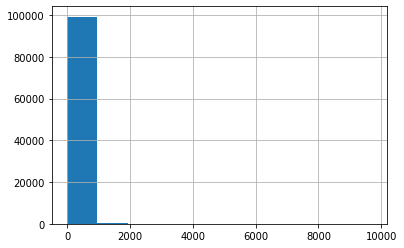

In [49]:
pandas_file['valor_autorizacao'].hist()

spark

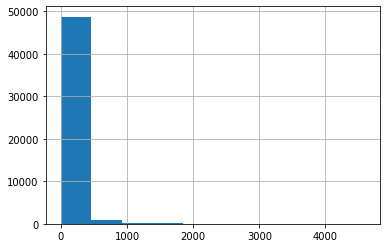

In [50]:
spark_file.sample(False, 0.5).toPandas()['valor_autorizacao'].hist()

#### <b> SQL </b>

pandas

N/A

spark

In [51]:
spark_file.createOrReplaceTempView('spark_view')

spark.sql(
"""
select 
    *
from
    spark_view
where
    mes_ref = '2020-01'
"""
).show(10)

+---------------+-------+-----------------+--------------------+----------+--------------------+------------------+-------------+--------------+
|cd_conta_cartao|mes_ref|valor_autorizacao| unidade_credenciada|adquirente|       valor_inverso|         log_valor|classif_valor|valor_mais_100|
+---------------+-------+-----------------+--------------------+----------+--------------------+------------------+-------------+--------------+
|        3718344|2020-01|             10.0|BOM PRECO AUTO PO...|        99|                 0.1| 2.302585092994046|        baixo|         110.0|
|        4266609|2020-01|             15.0|RECVIVO     *8798...|        39| 0.06666666666666667|  2.70805020110221|        baixo|         115.0|
|        4091063|2020-01|            31.81|SUPER ABC L DA PR...|        57| 0.03143665513989312|3.4597807057610526|        baixo|        131.81|
|       43580790|2020-01|            233.0|CINTIA HOLANDA DA...|        57|0.004291845493562232|   5.4510384535657|         alto| 

### <b> Exemplo: Cum Sum </b>

pandas

In [52]:
pandas_file.groupby(['cd_conta_cartao','mes_ref']) \
           .agg({'valor_autorizacao': 'sum', 'unidade_credenciada': 'count'}) \
           .groupby(level = [0]).cumsum()

valor_autorizacao  unidade_credenciada
cd_conta_cartao mes_ref                                        
2525402         2019-12            3000.00                    1
3177394         2020-01            5000.00                    2
3177395         2019-12             435.67                    3
3177396         2019-12              59.94                    1
                2020-01              71.64                    2
3359740         2020-01              13.10                    1
3359760         2019-12              45.97                    1
3359763         2020-01               9.90                    1
3359766         2020-01               3.66                    1
3359767         2019-12              26.34                    2
3359768         2020-01              46.00                    1
3359769         2019-12              22.75                    1
3359771         2020-01               7.00                    1
3359773         2020-01             153.14                    2
3359775         2019-12              93.44                    2
                2020-01             691.20                    4
3359790         2020-01              23.50                    1
3359791         2020-01              63.50                    2
3359792         2019-12              37.00                    1
3359794         2019-12              18.40                    1
3359802         2019-12              67.00                    1
                2020-01             118.49                    3
3359806         2020-01              85.45                    2
3359809         2019-12             205.88                    3
3359812         2020-01              35.10                    1
3359815         2019-12              81.45                    2
3359819         2020-01               8.94                    1
3359858         2019-12              13.00                    1
3359865         2019-12              51.43                    1
                2020-01              82.23                    2
...                                    ...                  ...
44590110        2020-01             120.00                    1
44590530        2020-01              56.50                    2
44591460        2020-01              52.00                    1
44591690        2020-01              78.65                    1
44592490        2020-01              20.00                    1
44594230        2020-01              31.40                    1
44594540        2020-01             254.44                    1
44594690        2020-01              39.77                    1
44595910        2020-01             904.29                    1
44597320        2020-01              30.00                    1
44598710        2020-01               7.90                    1
44598840        2020-01               8.79                    1
44600720        2020-01              18.11                    1
44601180        2020-01              20.02                    1
44602030        2020-01              20.24                    1
44602060        2020-01               8.00                    1
44602200        2020-01               6.00                    1
44603310        2020-01               1.00                    1
44606090        2020-01               5.00                    1
44608900        2020-01              32.50                    1
44609910        2020-01               4.73                    1
44609960        2020-01              59.98                    1
44610480        2020-01              22.01                    1
44611770        2020-01               1.00                    1
44612310        2020-01              52.00                    1
44612330        2020-01              38.23                    1
44613750        2020-01             100.64                    1
44700690        2020-01             209.01                    1
44706700        2020-01             100.61                    1
44738690        2020-01             126.18               

spark

In [53]:
a = spark_file.groupBy('cd_conta_cartao', 'mes_ref') \
              .agg({'valor_autorizacao': 'sum', 'cd_conta_cartao': 'count'}) \
              .orderBy('cd_conta_cartao','mes_ref')

In [54]:
from pyspark.sql import Window

window = Window.partitionBy('cd_conta_cartao') \
               .orderBy('mes_ref') \
               .rowsBetween(Window.unboundedPreceding, 0)

a.withColumn('cumsum_valor', f.sum('sum(valor_autorizacao)').over(window)) \
 .withColumn('cumsum_qtd', f.sum('count(cd_conta_cartao)').over(window)).show(50)

+---------------+-------+----------------------+----------------------+------------+----------+
|cd_conta_cartao|mes_ref|count(cd_conta_cartao)|sum(valor_autorizacao)|cumsum_valor|cumsum_qtd|
+---------------+-------+----------------------+----------------------+------------+----------+
|        3360262|2020-01|                     1|                 140.0|       140.0|         1|
|        3377281|2020-01|                     1|                   4.5|         4.5|         1|
|        3380788|2020-01|                     1|                   8.0|         8.0|         1|
|        3388454|2020-01|                     2|                  37.4|        37.4|         2|
|        3390168|2019-12|                     1|                 15.92|       15.92|         1|
|        3390558|2020-01|                     2|                  65.0|        65.0|         2|
|        3391089|2020-01|                     2|                 21.09|       21.09|         2|
|        3391282|2020-01|               

### <b> Boas Práticas </b>
<b> Recomendação: </b>

verificar o Spark MLlib, biblioteca para criação de modelos de Machine Learning (equivalente ao scikit-learn)

<b> Não fazer: </b>

* realizar iterações em linhas
* df.toPandas().head() ao invés de df.limit(5).toPandas()

<b> Se algo der errado: </b>

* consulte os coleguinhas ;)
* pesquise no Google
* pesquise no Stack Overflow (tag apache-spark)